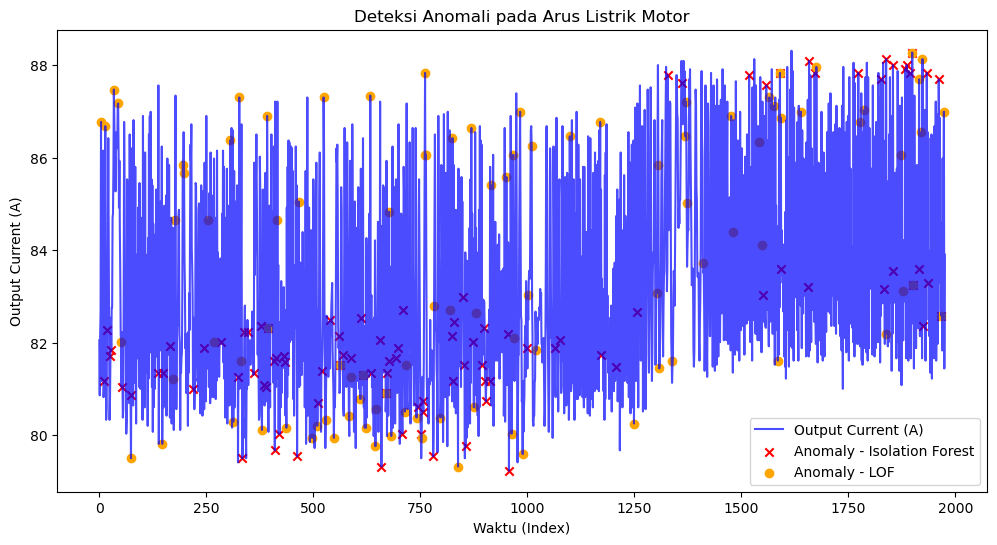

üîç Isolation Forest mendeteksi 99 anomali dari 1976 data (5.01%)
üîç LOF mendeteksi 99 anomali dari 1976 data (5.01%)
üìå Contoh Data Anomali:
      Output Frequency  Output Current  Output Voltage  Output Power  \
12               48.15           81.17           370.8          39.4   
18               48.17           82.27           371.0          38.1   
26               48.14           81.70           370.8          42.6   
28               48.17           81.83           371.0          38.9   
52               48.16           81.04           371.0          38.8   
...                ...             ...             ...           ...   
1924             48.17           82.36           371.2          39.3   
1933             48.16           87.83           371.2          47.5   
1936             48.16           83.29           371.1          39.2   
1961             48.16           87.69           371.3          47.6   
1967             48.16           82.58           371.1       

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# === 1. Load Data ===
file_path = "SP1_new.CSV"  # Sesuaikan dengan lokasi file
df = pd.read_csv(file_path)

# Kolom baru
df['RPM Ref'] = df['Frequency Reference'] * 120 / 2
df['RPM Out'] = df['Output Frequency'] * 120 / 2
df['Power Factor'] = (df['Output Power'] * 1000) / (np.sqrt(3) * df['Output Voltage'] * df['Output Current'])
df['Slip (%)'] = (abs(df['RPM Out'] - df['RPM Ref']) / df['RPM Out']) * 100
df['Apparent Power (kVA)'] = (np.sqrt(3) * df['Output Voltage'] * df['Output Current']) / 1000
df['Efficiency (%)'] = 93.5
df['Daya Output Motor (kW)'] = (np.sqrt(3) * df['Output Voltage'] * df['Output Current'] * df['Efficiency (%)'] / 100 * df['Power Factor']) / 1000
df['Torque (Nm)'] = 9555*df['Daya Output Motor (kW)']/df['RPM Out']
df

# === 2. Pilih Fitur & Target ===
features = [
    "Output Frequency", "Output Current", "Output Voltage",
    "Output Power", "Power Factor", "Daya Output Motor (kW)", "Torque (Nm)"
]  
data = df[features].dropna()

# === 3. Normalisasi Data ===
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# === 4. Deteksi Anomali dengan Isolation Forest ===
iso_forest = IsolationForest(n_estimators=200, contamination=0.05, random_state=42)
data["IsoForest_Score"] = iso_forest.fit_predict(data_scaled)

# === 5. Deteksi Anomali dengan Local Outlier Factor (LOF) ===
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
data["LOF_Score"] = lof.fit_predict(data_scaled)

# === 6. Identifikasi Anomali ===
data["Anomaly_IsoForest"] = data["IsoForest_Score"] == -1
data["Anomaly_LOF"] = data["LOF_Score"] == -1

# === 7. Visualisasi Hasil Deteksi Anomali ===
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Output Current"], label="Output Current (A)", color="blue", alpha=0.7)

# Anomali dari Isolation Forest
plt.scatter(data.index[data["Anomaly_IsoForest"]],
            data["Output Current"][data["Anomaly_IsoForest"]],
            color="red", marker="x", label="Anomaly - Isolation Forest")

# Anomali dari LOF
plt.scatter(data.index[data["Anomaly_LOF"]],
            data["Output Current"][data["Anomaly_LOF"]],
            color="orange", marker="o", label="Anomaly - LOF")

plt.xlabel("Waktu (Index)")
plt.ylabel("Output Current (A)")
plt.title("Deteksi Anomali pada Arus Listrik Motor")
plt.legend()
plt.show()

# === 8. Persentase Anomali ===
anomali_iso = data["Anomaly_IsoForest"].sum()
anomali_lof = data["Anomaly_LOF"].sum()
total_data = len(data)

print(f"üîç Isolation Forest mendeteksi {anomali_iso} anomali dari {total_data} data ({anomali_iso/total_data:.2%})")
print(f"üîç LOF mendeteksi {anomali_lof} anomali dari {total_data} data ({anomali_lof/total_data:.2%})")

# Menampilkan beberapa data yang terdeteksi sebagai anomali
print("üìå Contoh Data Anomali:")
print(data[data["Anomaly_IsoForest"]])

In [55]:
print("üìå Contoh Data Anomali:")
print(data[data["Anomaly_LOF"]])

üìå Contoh Data Anomali:
      Output Frequency  Output Current  Output Voltage  Output Power  \
4                48.17           86.77           371.1          45.7   
14               48.18           86.68           371.2          46.4   
34               48.18           87.47           371.3          45.7   
44               48.16           87.17           371.1          44.3   
51               48.16           82.01           370.9          41.1   
...                ...             ...             ...           ...   
1915             48.17           87.69           371.4          46.4   
1920             48.16           86.55           371.3          45.3   
1923             48.15           88.13           371.2          46.5   
1967             48.16           82.58           371.1          47.3   
1973             48.16           86.99           371.3          45.8   

      Power Factor  Daya Output Motor (kW)  Torque (Nm)  IsoForest_Score  \
4         0.819398               

In [56]:
# === 8. Filter Data yang Diteteksi Anomali oleh Kedua Model ===
anomali_bersama = data[(data["Anomaly_IsoForest"]) & (data["Anomaly_LOF"])]
print
# Menampilkan data yang dianggap anomali oleh kedua model
print("üìå Data yang Ditemukan Anomali oleh Isolation Forest dan LOF:")
anomali_bersama


üìå Data yang Ditemukan Anomali oleh Isolation Forest dan LOF:


Output Frequency  Output Current  Output Voltage  Output Power  \
394              48.18           82.32           371.1          38.4   
563              48.17           81.52           371.1          47.1   
617              48.18           81.30           371.1          38.3   
670              48.14           80.91           370.8          37.0   
1590             48.17           87.83           371.2          48.1   
1899             48.18           88.27           371.3          47.3   
1901             48.16           83.24           371.2          47.3   
1967             48.16           82.58           371.1          47.3   

      Power Factor  Daya Output Motor (kW)  Torque (Nm)  IsoForest_Score  \
394       0.725729                 35.9040   118.673973               -1   
563       0.898887                 44.0385   145.591263               -1   
617       0.732920                 35.8105   118.364926               -1   
670       0.712031                 34.5950   114.442330               -1   
1590      0.851792                 44.9735   148.682372               -1   
1899      0.833225                 44.2255   146.179138               -1   
1901      0.883813                 44.2255   146.239844               -1   
1967      0.891117                 44.2255   146.239844               -1   

      LOF_Score  Anomaly_IsoForest  Anomaly_LOF  
394          -1               True         True  
563          -1               True         True  
617          -1               True         True  
670          -1               True         True  
1590         -1               True         True  
1899         -1               True         True  
1901         -1               True         True  
1967         -1               True         True

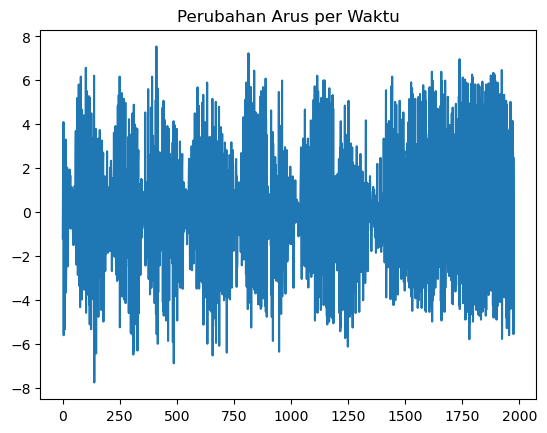

In [57]:
df["Delta Current"] = df["Output Current"].diff()
plt.plot(df["Delta Current"])
plt.title("Perubahan Arus per Waktu")
plt.show()
